# Node features
1. Cell Type
2. Width
3. Height
4. Orientation
5. Cell Degree <br>
6-15. Eigenvectors <br>
16-33. Persistence Diagram <br>
34-45. Degree distribution of local neighborhood <br>

# Net features 
1. Degree <br>
2-11. Eigenvectors

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import torch

In [24]:
fp = 'superblue/superblue_1/node_features.pkl'
with open(fp, 'rb') as f:
    features = pickle.load(f)

In [25]:
features

{'num_instances': 797938,
 'num_nets': 821523,
 'x_min': 5250,
 'x_max': 8253120,
 'y_min': 6660,
 'y_max': 8255070,
 'min_cell_width': 1920,
 'max_cell_width': 19211520,
 'min_cell_height': 13320,
 'max_cell_height': 20601600,
 'instance_features': array([[4.80127597e-01, 6.48768672e-01, 1.32000000e+02, 3.99800100e-04,
         0.00000000e+00, 0.00000000e+00],
        [5.25928512e-01, 5.46225273e-01, 3.59000000e+02, 7.99600200e-04,
         0.00000000e+00, 0.00000000e+00],
        [5.28372780e-01, 5.47840129e-01, 1.76000000e+02, 4.99750125e-04,
         0.00000000e+00, 6.00000000e+00],
        ...,
        [2.78009959e-01, 8.76059750e-02, 6.00000000e+00, 1.59920040e-03,
         0.00000000e+00, 0.00000000e+00],
        [2.72772243e-01, 8.35688333e-02, 6.00000000e+00, 1.59920040e-03,
         0.00000000e+00, 6.00000000e+00],
        [2.78068156e-01, 6.49979814e-02, 6.00000000e+00, 1.59920040e-03,
         0.00000000e+00, 0.00000000e+00]]),
 'sample_name': '/data/zluo/new_data/superblue

In [14]:
feats = features['instance_features'][:, 2:]
feats

array([[1.32000000e+02, 3.99800100e-04, 0.00000000e+00, 0.00000000e+00],
       [3.59000000e+02, 7.99600200e-04, 0.00000000e+00, 0.00000000e+00],
       [1.76000000e+02, 4.99750125e-04, 0.00000000e+00, 6.00000000e+00],
       ...,
       [6.00000000e+00, 1.59920040e-03, 0.00000000e+00, 0.00000000e+00],
       [6.00000000e+00, 1.59920040e-03, 0.00000000e+00, 6.00000000e+00],
       [6.00000000e+00, 1.59920040e-03, 0.00000000e+00, 0.00000000e+00]])

In [32]:
feats[:, 1].max()

0.1828085957021489

In [33]:
fp = 'superblue/superblue_1/degree.pkl'
with open(fp, 'rb') as f:
    degree = pickle.load(f)

In [36]:
len(degree['cell_degrees'])

797938

In [37]:
fp = 'superblue/superblue_1/node_neighbor_features.pkl'
with open(fp, 'rb') as f:
    pd = pickle.load(f)

In [41]:
pd['pd'].shape

(797938, 18)

In [44]:
pd['neighbor'].shape

(797938, 12)

In [43]:
pd

{'pd': array([[0.57659997, 3.78525   , 2.84100841, ..., 0.        , 0.        ,
         0.        ],
        [1.1236587 , 2.59016081, 0.48024168, ..., 0.        , 0.        ,
         0.        ],
        [1.1236587 , 2.59016081, 0.48024168, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.95083978, 0.6301005 ,
         0.03481547],
        [0.        , 0.        , 0.        , ..., 1.14630555, 1.43355668,
         0.14265637],
        [0.        , 0.        , 0.        , ..., 1.44839475, 1.73426691,
         0.1504663 ]]),
 'neighbor': array([[ 3.,  5.,  7., ...,  1.,  1.,  1.],
        [ 3., 10., 20., ...,  1.,  1.,  1.],
        [ 3., 10., 20., ...,  1.,  1.,  1.],
        ...,
        [ 1.,  1.,  1., ...,  7.,  6.,  5.],
        [ 1.,  1.,  1., ...,  7.,  9.,  8.],
        [ 1.,  1.,  1., ...,  7.,  7.,  7.]])}

In [95]:
fp = 'superblue/superblue_1/targets.pkl'
with open(fp, 'rb') as f:
    targets = pickle.load(f)

In [96]:
targets

{'demand': array([20.        , 12.5       , 13.33333333, ...,  0.83333333,
         0.83333333,  6.66666667]),
 'capacity': array([10.83333333, 15.83333333, 11.66666667, ...,  1.66666667,
         2.5       , 23.33333333]),
 'classify': tensor([[1],
         [0],
         [1],
         ...,
         [0],
         [0],
         [0]])}

(array([150094.,  98495.,  59788., 160273., 169909., 101077.,  40082.,
         13409.,   3531.,    738.,    237.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55.]),
 <BarContainer object of 11 artists>)

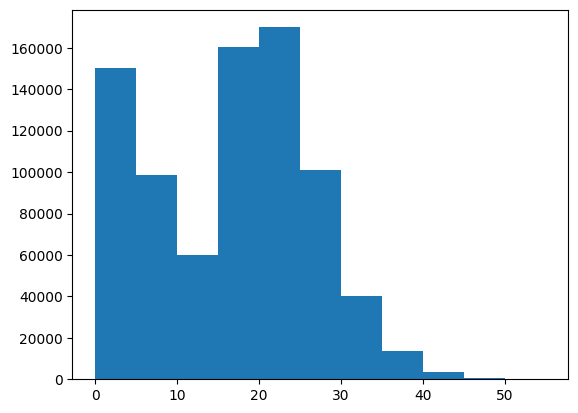

In [99]:
plt.hist(targets['demand'], bins=np.arange(0, 60, 5))

(array([186513.,  30760.,  66861., 437682.,  71335.,   4787.,      0.,
             0.,      0.,      0.,      0.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55.]),
 <BarContainer object of 11 artists>)

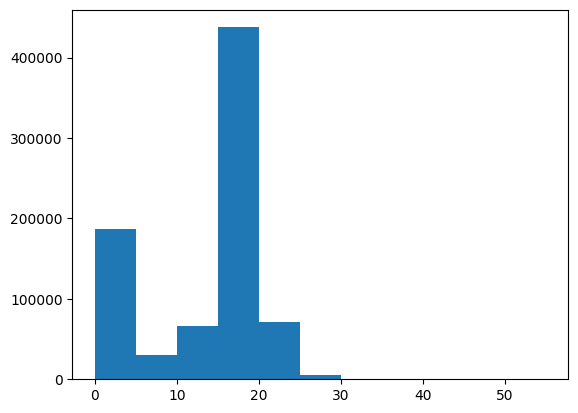

In [100]:
plt.hist(targets['capacity'], bins=np.arange(0, 60, 5))

In [64]:
np.array(targets['classify']).mean()

0.7836974802553582

In [79]:
clf = np.array(targets['classify'].flatten())

In [80]:
clf[:20]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [81]:
chips = [1, 2, 3, 5, 6, 7, 9, 11, 14, 16, 18, 19]
for c in chips:
    fp = f'superblue/superblue_{c}/targets.pkl'
    with open(fp, 'rb') as f:
        targets = pickle.load(f)
    clf = np.array(targets['classify'].flatten()).mean()
    print(f'Chip {c}: {clf}')

Chip 1: 0.7836974802553582
Chip 2: 0.39604969059028605
Chip 3: 0.5329729465833162
Chip 5: 0.6323278902193057
Chip 6: 0.7270103253910845
Chip 7: 0.8123872296164215
Chip 9: 0.3656470303843554
Chip 11: 0.569042242691056
Chip 14: 0.6268041612045209
Chip 16: 0.6612834508196233
Chip 18: 0.6097193658255259
Chip 19: 0.6327009050267146


In [150]:
fp = 'superblue/superblue_1/targets.pkl'
with open(fp, 'rb') as f:
    targets = pickle.load(f)
clf = np.array(targets['classify'].flatten())
clf[-100:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [153]:
targets['classify']

tensor([[1],
        [0],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [156]:
torch.randn(3, 5, requires_grad=True)

tensor([[-0.6868, -1.9800,  0.3233,  0.3805, -1.0642],
        [ 0.6000,  0.1901, -0.5083,  1.7254, -0.4392],
        [ 3.2952,  1.9224, -1.2898, -1.9656, -0.2964]], requires_grad=True)

In [157]:
torch.empty(3, dtype=torch.long).random_(5)

tensor([4, 0, 2])

In [147]:
fp = 'superblue/superblue_1/net_demand_capacity.pkl'
with open(fp, 'rb') as f:
    targets = pickle.load(f)
# clf = np.array(targets['classify'].flatten())
# clf[-100:]
capacity = np.array(targets['demand']) / np.array(targets['capacity'])
capacity

C:\Users\rebal\AppData\Local\Temp\ipykernel_63420\2521173607.py:6: RuntimeWarning: invalid value encountered in divide
  capacity = np.array(targets['demand']) / np.array(targets['capacity'])


array([0.78220295,        nan,        nan, ..., 0.63157895, 0.67123288,
       0.69230769])

In [148]:
capacity = np.array([d/c if c > 0 else 0 for d, c in zip(targets['demand'], targets['capacity'])])
clf = (capacity > 0.9).astype(int)
clf

array([0, 0, 0, ..., 0, 0, 0])

In [155]:
torch.tensor(clf).unsqueeze_(1)

tensor([[1],
        [0],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [145]:
np.array(targets['demand'])[:20]

array([10.65378645,  0.        ,  0.        ,  0.        ,  0.        ,
       18.        , 27.        , 24.        , 16.        , 19.        ,
       20.        , 18.        , 15.        , 18.        , 18.        ,
        0.        , 20.        , 19.        , 18.        , 17.        ])

In [146]:
np.array(targets['capacity'])[:20]

array([13.62023303,  0.        ,  0.        ,  0.        ,  0.        ,
       18.        , 23.        , 22.        , 14.        , 19.        ,
       20.        , 19.        , 16.        , 19.        , 18.        ,
        0.        , 20.        , 19.        , 18.        , 19.        ])

In [103]:
dataset = torch.load("../h_dataset_eigenvectors.pt")

C:\Users\rebal\AppData\Local\Temp\ipykernel_63420\470271967.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load("../h_dataset_eigenvectors.pt")


In [105]:
h_dataset = []
for data in dataset:
    h_dataset.append(data)

In [106]:
load_data_indices = [idx for idx in range(len(h_dataset))]
load_data_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [112]:
h_dataset[4]

HeteroData(
  design_name='superblue_18',
  num_instances=459495,
  variant_data_lst=[1],
  node={ x=[459495, 35] },
  net={ x=[468888, 1] },
  (node, to, net)={
    edge_index=[2, 1830299],
    edge_weight=[1830299],
    edge_type=[1830299],
  },
  (net, to, node)={
    edge_index=[2, 1830299],
    edge_weight=[1830299],
  }
)